# Úkol č. 1 - redukce dimenzionality a binární klasifikace

  * **Deadline je 22. 4. 2024, 23:59:59**, pokud odevzdáte úkol do 29. 4. 2024, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu se musíte vypořádat s vysokou dimenzí problému a poté úspěšně aplikovat vhodný klasfikační model.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 28x28 pixelů ve stupních šedi, které byly získány z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Postupně aplikujte modely **SVM**, **naivní Bayesův klasifikátor** a **LDA**, přičemž pro každý z nich:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Vyberte si hlavní hyperparametry k ladění (pokud model má hyperparametry) a najděte jejich nejlepší hodnoty.
      * Experimentujte se standardizací/normalizací dat.
      * U SVM vyzkoušejte alespoň dvě různé jádrové funkce.
      * Získané výsledky vždy řádně okomentujte.


  * Postupně aplikujte metody redukce dimenzionality PCA a LLE, přičemž pro každou z nich: 
      * Zopakujte předchozí kroky a pokuste modely vylepšit
      * Zkoumejte jaká dimenze je z hlediska výkonnosti finálního modelu nejlepší.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **label** a identifikátory do sloupce **ID**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

# Data reading

In [1]:
# import the required libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading data
data = pd.read_csv('train.csv')

In [21]:
display(data.shape)

(2400, 785)

In [22]:
display(data.head(10))

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,1,0,0,0,0,0,0,0,0,0,...,208,122,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,75,11,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,106,103,76,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,81,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,157,120,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,9,...,98,6,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 14.4 MB


None

In [24]:
display(data.describe())

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,2400.000000,2400.0,2400.0,2400.0,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.00000,2400.000000,2400.000000,2400.0
mean,0.484167,0.0,0.0,0.0,0.002083,0.098333,0.302500,0.846250,2.256250,6.025000,...,65.379583,26.975417,9.651667,3.307500,1.249167,0.460417,0.11250,0.038750,0.010833,0.0
std,0.499853,0.0,0.0,0.0,0.067682,1.895871,5.014792,9.262155,15.491603,25.358871,...,66.874570,49.060424,30.540885,18.067668,11.443957,6.363199,2.82043,1.742655,0.530723,0.0
min,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
25%,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
50%,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
75%,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,114.250000,35.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
max,1.000000,0.0,0.0,0.0,3.000000,69.000000,188.000000,189.000000,219.000000,243.000000,...,248.000000,252.000000,246.000000,212.000000,179.000000,176.000000,88.00000,85.000000,26.000000,0.0


- Some pixels have completely zero values(ex. 1, 2, 3, 784 ...), indicating that they may be background or unused space in the images.
- There are also columns with very low standard deviation(ex. 4). This indicates that the pixels are almost unchanged from sample to sample. This may be an indication that these pixels do not carry meaningful information for class distinction.

In [25]:
desc = data.describe()

zero_mean_count = (desc.loc['mean'] == 0).sum()
low_mean_count = (desc.loc['mean'] < 1).sum()
# Define the threshold for a "small" standard deviation, I decided to set it to 1 as it is less than 0.5% of the range of possible values.
std_threshold = 1
low_std_count = (desc.loc['std'] < std_threshold).sum()

zero_mean_count, low_mean_count, low_std_count - zero_mean_count

(18, 232, 57)

- Thus, we have 18 pixels always have zero value and another 57 are non-zero but with a small deviation, which may also indicate that they carry little information, and as many as 232 pixels have an average value less than 1, which means that they are practically indistinguishable in the image (black) and again indicates that they carry few important features.

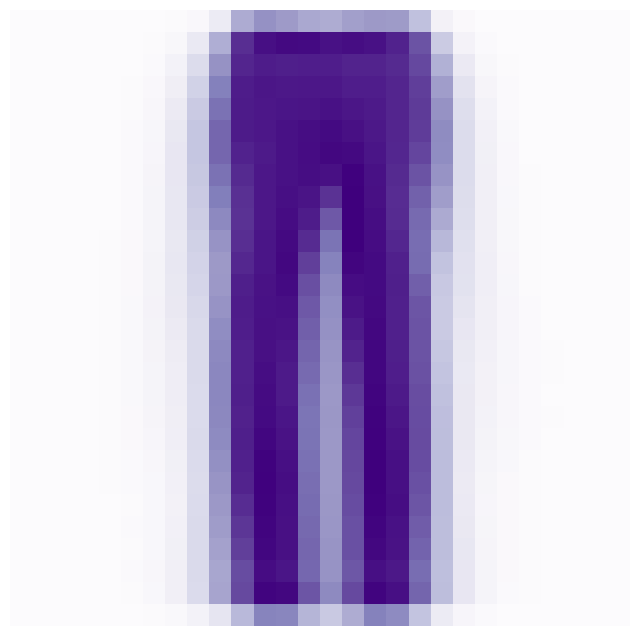

In [26]:
pixel_means = data.iloc[:, 1:].mean(axis=0).values

pixel_matrix = pixel_means.reshape(28, 28)

plt.figure(figsize=(8, 8))
sns.heatmap(pixel_matrix, cmap='Purples', cbar=False)
plt.axis('off')
plt.show()

- The heatmap of mean values really shows that we have a lot of pixels on the edges have a very low value on average. The heatmap does look like a picture of trousers.

In [27]:
display(data.nunique())

label        2
pixel1       1
pixel2       1
pixel3       1
pixel4       3
            ..
pixel780    22
pixel781     9
pixel782     3
pixel783     2
pixel784     1
Length: 785, dtype: int64

In [28]:
data.isnull().sum(axis=0).sum()

0

- No NaN values!

In [29]:
def plot_images_by_class(data, class_label, num_images):
    # Filter the data by class label
    class_data = data[data.iloc[::, 0] == class_label].iloc[:num_images, 1:]

    # Set the size of the figure based on the number of images
    plt.figure(figsize=(num_images * 3, 3))

    # Go through each image in the filtered dataset
    for i, (index, image_data) in enumerate(class_data.iterrows(), 1):
        image = image_data.values.reshape(28, 28)
        plt.subplot(1, num_images, i)
        plt.imshow(image, cmap='gray') # the image in shades of grey
        plt.title(f'Class {class_label}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

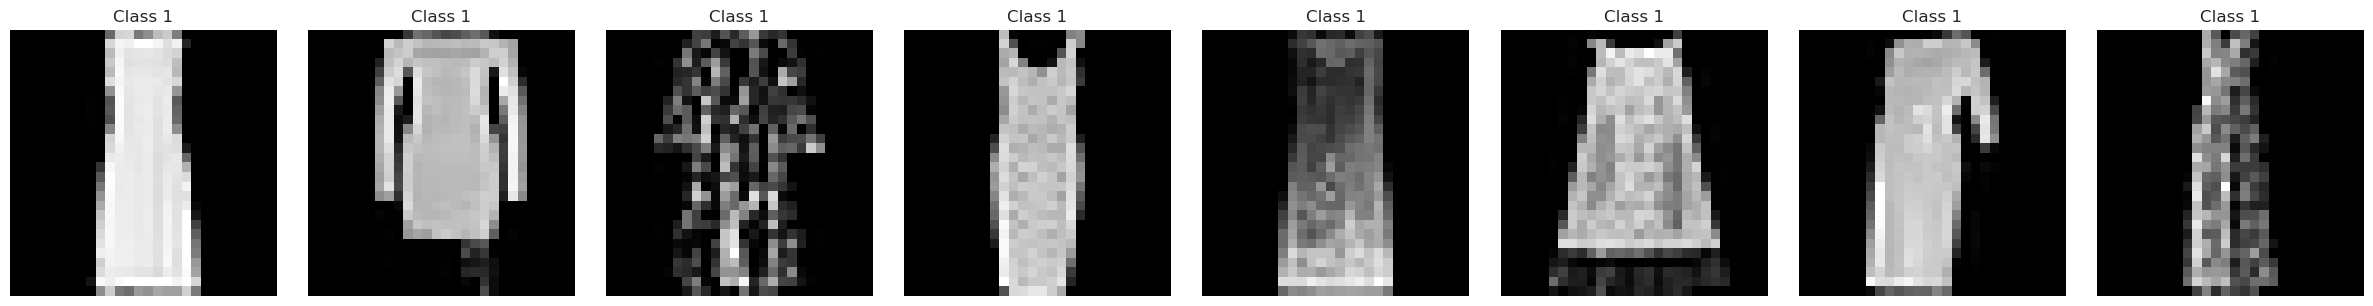

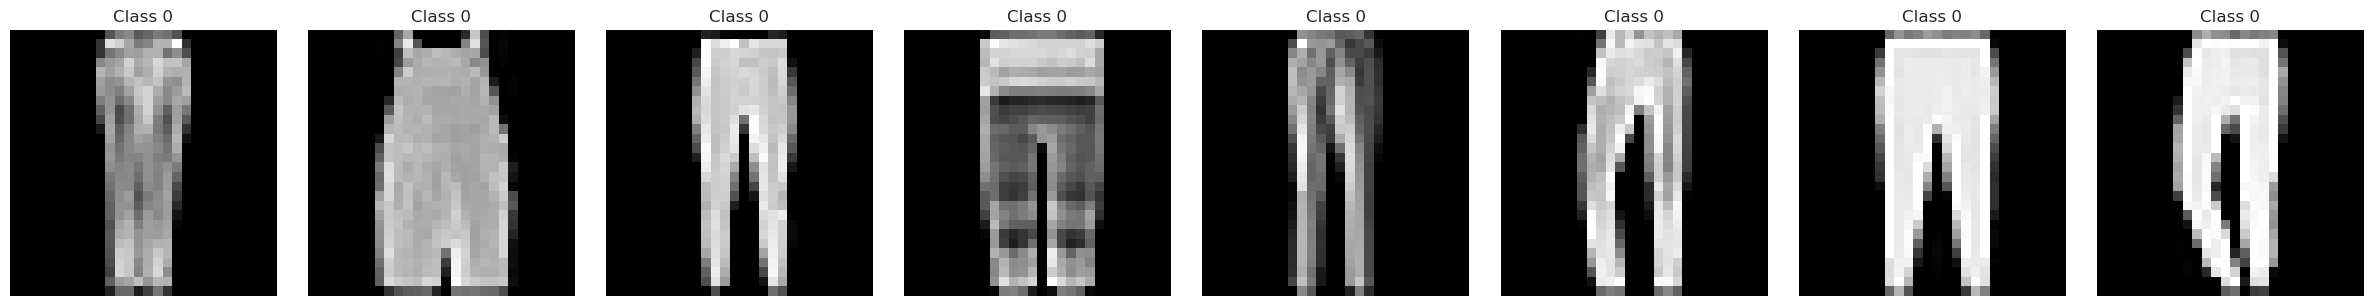

In [30]:
#samples of both classes
plot_images_by_class(data, class_label=1, num_images=8)
plot_images_by_class(data, class_label=0, num_images=8)

- We have 2,400 samples from two classes of data. Class 1 is something from the top clothes and class 0 the bottom. First column is the data class and then integer pixel values from 0 to 255.

# Data splitting

-  First, we divide the dataset into the target variable we want to predict and the attribute matrix from which we will predict.In our case, the target variable is *label*

In [3]:
Xdata = data.drop('label', axis=1)
ydata = data['label']

In [4]:
rd_seed = 356 # data is distributed randomly, but it is good to have a fixed random seed in testing
from sklearn.model_selection import train_test_split

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.4, random_state=rd_seed)
display(Xtrain.shape)
display(ytrain.shape)
display(Xtest.shape)
display(ytest.shape)

(1440, 784)

(1440,)

(960, 784)

(960,)

In [6]:
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=rd_seed)
display(Xval.shape)
display(yval.shape)
display(Xtest.shape)
display(ytest.shape)

(480, 784)

(480,)

(480, 784)

(480,)

- We have enough data samples so I applied the standard 60/20/20 split between training, validation and testing data.

# SVM

- $SVM$ is designed specifically for binary classification and is capable of handling high dimensionality data, which makes it a suitable candidate for this task. However, the SVM model is sensitive to the scale of the features, which makes data preprocessing an integral part of the training process. In this context, data normalization will be applied. The high dimensionality of the data can make the model difficult to interpret. This means that it can be difficult to understand the influence of individual pixels on the model's decision making, especially when nonlinear kernels are used.

 - Based on the above, SVM is a suitable choice for our task.


In [14]:
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [16]:
# Min-max scaler fit on training data
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)

# Then we apply the same transformation to the validation and test data
Xval_scaled = scaler.transform(Xval)
Xtest_scaled = scaler.transform(Xtest)

In [15]:
from sklearn.model_selection import ParameterGrid
import sklearn.metrics as metrics

In [37]:
# Define the grid of my chosen hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 20, 30, 50],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [1e-3, 1e-2, 0.1, 1, 10],
    'degree': [2, 3, 4, 5, 6, 8, 10]
}
param_comb = ParameterGrid(param_grid)

- The parameter C varies from 0.1 to 50 to explore models with different degrees of regularization.  I decided to test 3 kernels linear, RBF and polynomial. For gamma, values were chosen so that the effect of varying the width of the 'tracks' around the support vectors, from very wide to very narrow, could be investigated. for the polynomial kernel, different degrees were chosen to test the effect of more complex polynomial decision boundaries on the accuracy of the model.

In [38]:
val_acc1 = []
train_acc1 = []
# Try all combinations of hyperparameters
for params in param_comb:
    if params['kernel'] == 'poly':
        clf = SVC(C=params['C'], kernel=params['kernel'], gamma=params['gamma'], degree=params['degree'])
    else:
        clf = SVC(C=params['C'], kernel=params['kernel'], gamma=params['gamma'])

    clf.fit(Xtrain, ytrain)
    train_acc1.append(metrics.accuracy_score(ytrain, clf.predict(Xtrain)))
    val_acc1.append(metrics.accuracy_score(yval, clf.predict(Xval)))

ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and need to bepreprocessed.

- I got this error, but it went away when I used normalization. Maybe it is related to the input data or the parameters I have chosen

In [39]:
val_acc = []
train_acc = []
# Try all combinations of hyperparameters
for params in param_comb:
    if params['kernel'] == 'poly':
        clf = SVC(C=params['C'], kernel=params['kernel'], gamma=params['gamma'], degree=params['degree'])
    else:
        clf = SVC(C=params['C'], kernel=params['kernel'], gamma=params['gamma'])

    clf.fit(Xtrain_scaled, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, clf.predict(Xtrain_scaled)))
    val_acc.append(metrics.accuracy_score(yval, clf.predict(Xval_scaled)))

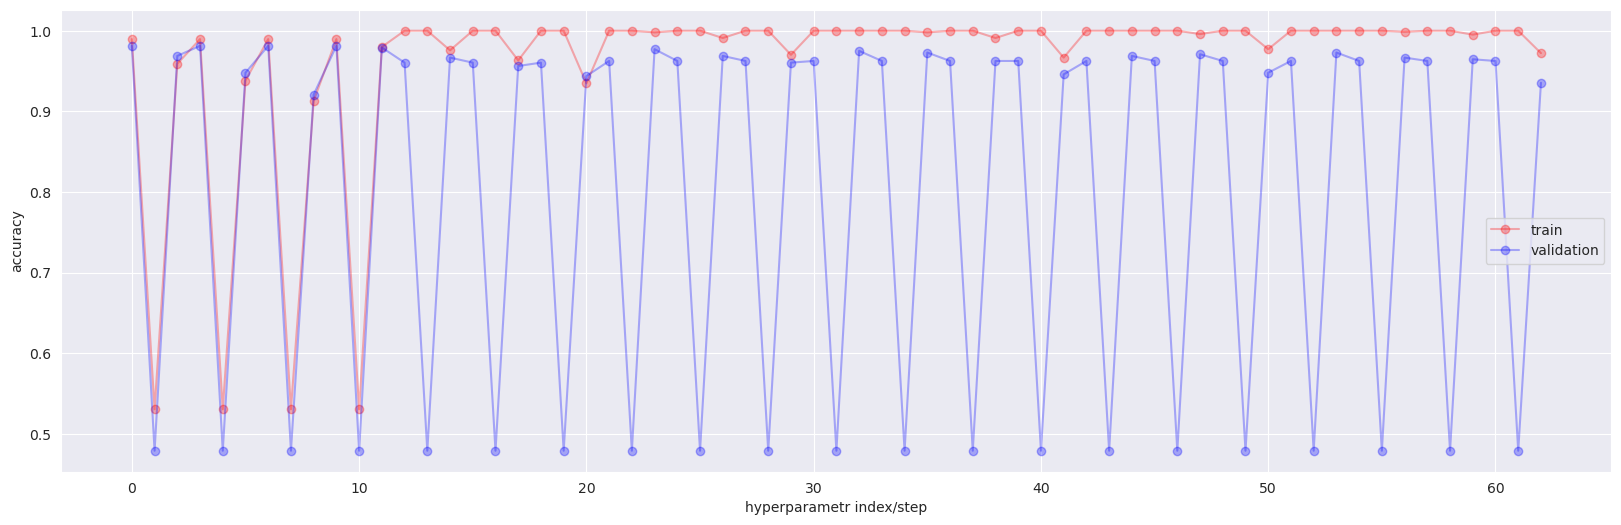

In [40]:
# Visualisation of accuracy results
step = 10

plt.figure(figsize=(20,6))
plt.plot(train_acc[::step], 'or-', alpha=0.3)
plt.plot(val_acc[::step], 'ob-', alpha=0.3)
plt.xlabel('hyperparametr index/step')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.show()

- Obviously, the model shows excellent performance with an accuracy close to 1.0 on the training data. However, some peaks of accuracy drop on the validation sample may indicate overtraining in these particular cases.

## Best model

In [41]:
# Selection of the best hyperparameters based on validation data
best_params = param_comb[np.argmax(val_acc)]
best_params

{'kernel': 'rbf', 'gamma': 0.01, 'degree': 2, 'C': 10}

- RBF kernel for me is expected as it handles well cases when there are non-linear and complex relationships between classes.
- C equal to 10 indicates that the model finds a golden mean between learning and regularization, not penalizing too much for errors, but also not allowing too much adaptation to the data.
- gamma equal to 0.01 for the RBF kernel achieves good flexibility of the decision boundary.

In [42]:
# Training a SVM with the best hyperparameters and calculating its accuracy
best_svm = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'])
best_svm.fit(Xtrain_scaled, ytrain)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, best_svm.predict(Xtrain_scaled))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval, best_svm.predict(Xval_scaled))))

accuracy score (train): 0.999306
accuracy score (validation): 0.985417


- the results may seem to be excellent without reducing the dimensionality of the data

# Naive Bayes

 - A naive Bayesian classifier assumes conditional independence of features in the data. Although this assumption is rarely met (In our task in images where neighboring pixels may be correlated). The model is simple, but can be quite efficient and compete with complex models. The model also provides probabilistic estimates to determine confidence in the prediction

In [28]:
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB

All four main types of naive Bayesian classifier are applied in this analysis: Gaussian, Multinomial, Bernoulliian and Categorical. The choice of a particular classifier is driven by the intended way of perceiving and processing the data: as continuous quantities, as countable frequencies, or as binary features.

- Gaussian naive Bayes is preferred if we consider pixel values as Gaussian distributed quantities, which may be relevant for continuous pixel intensity data.
- Multinomial is appropriate when the data represent frequencies of occurrence of certain features, which can be interpreted as the number of times a pixel takes a certain value within a range.
- The Bernoulliian classifier is used when the data is binarized and each pixel is considered as the presence or absence of a certain state (e.g., bright or dark).
- Categorical naive Bayes treats each pixel as a separate category with a limited set of possible values.

I did not use normalization/standardization because these methods do not directly affect the conditional probabilities used in the model.

In [44]:
# initialization of naive Bayes models
gnb = GaussianNB()
mnb = MultinomialNB()
cnb = CategoricalNB(min_categories=256)  # 256 possible values from 0 to 255

In [45]:
# fitting
gnb.fit(Xtrain, ytrain)
mnb.fit(Xtrain, ytrain)
cnb.fit(Xtrain, ytrain)

CategoricalNB(min_categories=256)

In [46]:
# Prediction and evaluation
y_pred_gnb = gnb.predict(Xval)
accuracy_gnb = metrics.accuracy_score(yval, y_pred_gnb)

y_pred_mnb = mnb.predict(Xval)
accuracy_mnb = metrics.accuracy_score(yval, y_pred_mnb)

y_pred_cnb = cnb.predict(Xval)
accuracy_cnb = metrics.accuracy_score(yval, y_pred_cnb)

In [47]:
# results
print(f'Accuracy of Gaussian Naive Bayes: {accuracy_gnb:.4f}')
print(f'Accuracy of Multinomial Naive Bayes: {accuracy_mnb:.4f}')
print(f'Accuracy of Categorical Naive Bayes: {accuracy_cnb:.4f}')

Accuracy of Gaussian Naive Bayes: 0.9292
Accuracy of Multinomial Naive Bayes: 0.9458
Accuracy of Categorical Naive Bayes: 0.9021


In [48]:
best_accuracy = 0
best_threshold = 0

accuracies = []

# all possible thresholds from 0 to 255
for threshold in range(256):
    binarizer = Binarizer(threshold=threshold)

    # binarize the training and validation dataset
    X_train_binarized = binarizer.fit_transform(Xtrain)
    X_val_binarized = binarizer.transform(Xval)

    # Create and train a Bernoulli naive Bayesian classifier
    model = BernoulliNB()
    model.fit(X_train_binarized, ytrain)

    # Estimate the model's performance
    y_pred = model.predict(X_val_binarized)
    accuracy = metrics.accuracy_score(yval, y_pred)
    accuracies.append(accuracy)

    # Storing the best threshold
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print(f"Best accuracy: {best_accuracy:.4f}, Best threshold: {best_threshold}")

Best accuracy: 0.9542, Best threshold: 81


- Bernoulliian naive Bayes showed the best accuracy of 95.42% with a binarization threshold of 81. This result is particularly interesting because it shows that simply converting the original pixel values into binary features based on a certain threshold achieves the best classification among the three models tested.
- I realize that Multinomial Bayes is strange to apply in our problem, but surprisingly its results were better than those of Gaussian and Categorical

# LDA

- LDA can be effective for binary image classification, providing a clear separation between two classes due to linear boundaries. This method is particularly suitable when the images of two classes are linearly separable and the assumptions of normality of feature distribution and similarity of covariance matrices are close to reality.

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [50]:
solvers = ['svd', 'lsqr', 'eigen']

In [51]:
# map for the results
accuracy_scores = {}

for solver in solvers:
    lda = LinearDiscriminantAnalysis(solver=solver)
    lda.fit(Xtrain, ytrain)
    ypred = lda.predict(Xval)
    accuracy = metrics.accuracy_score(yval, ypred)
    accuracy_scores[solver] = accuracy
    print(f'Solver: {solver}, Accuracy: {accuracy:.4f}')

best_solver = max(accuracy_scores, key=accuracy_scores.get)
print(f'Best solver: {best_solver} with accuracy: {accuracy_scores[best_solver]:.4f}')

Solver: svd, Accuracy: 0.9292
Solver: lsqr, Accuracy: 0.9313


LinAlgError: The leading minor of order 1 of B is not positive definite. The factorization of B could not be completed and no eigenvalues or eigenvectors were computed.

In [52]:
accuracy_scores = {}

for solver in solvers:
    lda = LinearDiscriminantAnalysis(solver=solver)
    lda.fit(Xtrain_scaled, ytrain)
    ypred = lda.predict(Xval_scaled)
    accuracy = metrics.accuracy_score(yval, ypred)
    accuracy_scores[solver] = accuracy
    print(f'Solver: {solver}, Accuracy: {accuracy:.4f}')

best_solver = max(accuracy_scores, key=accuracy_scores.get)
print(f'Best solver: {best_solver} with accuracy: {accuracy_scores[best_solver]:.4f}')

Solver: svd, Accuracy: 0.9292
Solver: lsqr, Accuracy: 0.9271


LinAlgError: The leading minor of order 1 of B is not positive definite. The factorization of B could not be completed and no eigenvalues or eigenvectors were computed.

- When evaluating the different solvers for LDA, it was found that the 'svd' and 'lsqr' solvers performed well, demonstrating accuracies of 92.92% and 92.71% respectively. At the same time, the 'eigen' solver encountered numerical instability as the matrix used to compute the eigenvalues was found to be not positively defined, preventing the completion of the factorization. The application of data normalization has almost no effect on the results.

# PCA

- PCA is useful for reducing the dimensionality of data before classification, especially when high correlation between features is present in the data. For images, this can mean simplifying information and removing redundant data, which can lead to faster and more efficient model learning without significant loss of information.

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding

## SVM

In [11]:
pca_params_svm = {
    'n_components': range(1, 160),
    'C': [0.1, 1, 10, 20],
    'kernel': ['linear', 'rbf'],
    'gamma': [1e-3, 1e-2, 0.1, 1],
}
params_comb_pca_svm = ParameterGrid(pca_params_svm)

- I reduced the number of parameters so the training wouldn't last so long. I also decided to limit myself to a reasonable number of components.

In [23]:
def train_and_evaluate_svm(model_dim_reduction, params_grid, X_train, y_train, X_val, y_val):
    train_acc = []
    val_acc = []

    # cycle through all combinations of hyperparameters
    for parameters in params_grid:
        # initialise the dimensionality reduction model
        if model_dim_reduction == 'pca':
            dim_reduction = PCA(n_components=parameters['n_components'])
        elif model_dim_reduction == 'lle':
            dim_reduction = LocallyLinearEmbedding(n_components=parameters['n_components'])
        else:
            raise ValueError("Unsupported dimensionality reduction method.")

        # convert the data
        Xtrain_reduced = dim_reduction.fit_transform(X_train)
        Xval_reduced = dim_reduction.transform(X_val)

        # train
        svm = SVC(kernel=parameters['kernel'], gamma=parameters['gamma'], C=parameters['C'])
        svm.fit(Xtrain_reduced, y_train)

        # preserve accuracies
        train_acc.append(metrics.accuracy_score(y_train, svm.predict(Xtrain_reduced)))
        val_acc.append(metrics.accuracy_score(y_val, svm.predict(Xval_reduced)))

    return train_acc, val_acc

In [13]:
train_acc, val_acc = train_and_evaluate_svm(
    model_dim_reduction='pca',
    params_grid=params_comb_pca_svm,
    X_train=Xtrain_scaled,
    y_train=ytrain,
    X_val=Xval_scaled,
    y_val=yval
)

In [14]:
best_params_pca_svm = params_comb_pca_svm[np.argmax(val_acc)]
best_params_pca_svm

{'n_components': 111, 'kernel': 'rbf', 'gamma': 0.01, 'C': 10}

In [15]:
# Training a SVM with the best hyperparameters and calculating its accuracy
pca = PCA(n_components=best_params_pca_svm['n_components'])
Xtrain_pca = pca.fit_transform(Xtrain_scaled)
Xval_pca = pca.transform(Xval_scaled)
best_svm_pca = SVC(C=best_params_pca_svm['C'], kernel=best_params_pca_svm['kernel'], gamma=best_params_pca_svm['gamma'])
best_svm_pca.fit(Xtrain_pca, ytrain)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, best_svm_pca.predict(Xtrain_pca))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval, best_svm_pca.predict(Xval_pca))))

accuracy score (train): 0.997917
accuracy score (validation): 0.983333


- With limited computational resources and the need to maintain a reasonable training time, it was decided to limit the amount of parameters for PCA and SVM. At the same time, the data were normalised to speed up convergence during training. However, despite the normalisation and the chosen range of parameters, no significant improvement in the model was achieved(0.983333 with PCA against 0.985417 without). This may indicate the need for finer parameter tuning and possibly the use of more sophisticated data processing techniques, which is not feasible in the current resource constrained environment. The results emphasise the importance of the balance between computational efficiency and model quality, and the trade-off between the depth of search in parameter space and available resources.

## Bayes

- PCA implies continuity of the data, so it is logical to restrict to Gaussian Bayes

In [26]:
def train_and_evaluate_bayes(X_train, y_train, X_val, y_val, model_dim_reduction):
    best_accuracy = 0
    best_n_components = None

    # go through the number of components
    for n_components in range(1, 784):
        # initialise the dimensionality reduction model
        if model_dim_reduction == 'pca':
            dim_reduction = PCA(n_components=n_components)
        elif model_dim_reduction == 'lle':
            dim_reduction = LocallyLinearEmbedding(n_components=n_components)
        else:
            raise ValueError("Unsupported dimensionality reduction method.")

        X_train_reduced = dim_reduction.fit_transform(X_train)
        X_val_reduced = dim_reduction.transform(X_val)

        # train
        classifier = GaussianNB()
        classifier.fit(X_train_reduced, y_train)

        # estimate
        train_accuracy = metrics.accuracy_score(y_train, classifier.predict(X_train_reduced))
        val_accuracy = metrics.accuracy_score(y_val, classifier.predict(X_val_reduced))

        # update
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_n_components = n_components

    return best_accuracy, best_n_components

In [63]:
best_accuracy, best_n_components = train_and_evaluate_bayes(Xtrain, ytrain, Xval, yval, 'pca')

In [64]:
print(f'Best Number of PCA Components: {best_n_components}')
print(f'Best Accuracy: {best_accuracy}')

Best Number of PCA Components: 16
Best Accuracy: 0.9520833333333333


In [65]:
best_accuracy, best_n_components = train_and_evaluate_bayes(Xtrain_scaled, ytrain, Xval_scaled, yval, 'pca')

In [66]:
print(f'Best Number of PCA Components: {best_n_components}')
print(f'Best Accuracy: {best_accuracy}')

Best Number of PCA Components: 18
Best Accuracy: 0.9520833333333333


- After applying PCA and a Gaussian naive Bayesian classifier, an improvement in accuracy from 0.9292 to 0.9541 is observed. Normalising the data in combination with PCA led to a result of 0.9520 using 18 components, i.e., non-normalisation produced no improvement. These results indicate that PCA contributes to a moderate improvement in the classification ability of the model.

## LDA

In [7]:
solvers = ['svd', 'lsqr']

In [8]:
def train_and_validate_LDA(X_train, y_train, X_val, y_val, model_dim_reduction, solvers):
    accuracy_scores = {}

    for n in range(1, 784):
        # initialise the dimensionality reduction model
        if model_dim_reduction == 'pca':
            dim_reduction = PCA(n_components=n)
        elif model_dim_reduction  == 'lle':
            dim_reduction = LocallyLinearEmbedding(n_components=n)
        else:
            raise ValueError("Unsupported dimensionality reduction method.")

        Xtrain_reduced = dim_reduction.fit_transform(X_train)
        Xval_reduced = dim_reduction.transform(X_val)

        for slvr in solvers:
            lda = LinearDiscriminantAnalysis(solver=slvr)
            lda.fit(Xtrain_reduced, y_train)

            ypred = lda.predict(Xval_reduced)
            accuracy = metrics.accuracy_score(y_val, ypred)

            accuracy_scores[(n, slvr)] = accuracy

    return accuracy_scores

In [17]:
accuracy_scores = train_and_validate_LDA(Xtrain, ytrain, Xval, yval, 'pca', solvers)

In [18]:
best_key = max(accuracy_scores, key=accuracy_scores.get)
best_n_components, best_solver = best_key
best_accuracy = accuracy_scores[best_key]

print(f'Best number of PCA components: {best_n_components}')
print(f'Best solver: {best_solver}')
print(f'Best accuracy: {best_accuracy:.4f}')

Best number of PCA components: 190
Best solver: svd
Best accuracy: 0.9792


In [19]:
# try normalisation
accuracy_scores = train_and_validate_LDA(Xtrain_scaled, ytrain, Xval_scaled, yval, 'pca', solvers)

In [20]:
best_key = max(accuracy_scores, key=accuracy_scores.get)
best_n_components, best_solver = best_key
best_accuracy = accuracy_scores[best_key]

print(f'Best number of PCA components: {best_n_components}')
print(f'Best solver: {best_solver}')
print(f'Best accuracy: {best_accuracy:.4f}')

Best number of PCA components: 185
Best solver: svd
Best accuracy: 0.9792


- Here we also see an improvement from 0.9313 (the best result without PCA) to 0.9792, normalisation again bringing no improvement

# LLE

 - LLE is a nonlinear dimensionality reduction technique that is well suited for datasets where complex, nonlinear relationships between features exist, and where the data can best be described using local neighborhoods. In the case of images, LLE can help reveal hidden structures that are not apparent in the original high-dimensional space, while preserving important local information such as geometric relationships between pixels. This could improve classification performance by providing clearer distinctions between classes in the reduced-dimensionality space.

## SVM

In [21]:
lle_params_svm = {
    'n_components': range(1, 160),
    'C': [0.1, 1, 10, 20],
    'kernel': ['linear', 'rbf'],
    'gamma': [1e-3, 1e-2, 0.1, 1],
}
params_comb_lle_svm = ParameterGrid(lle_params_svm)

In [37]:
train_acc, val_acc = train_and_evaluate_svm(
    model_dim_reduction= "lle",
    params_grid=params_comb_lle_svm,
    X_train=Xtrain_scaled,
    y_train=ytrain,
    X_val=Xval_scaled,
    y_val=yval
)

In [38]:
best_params_lle_svm = params_comb_lle_svm[np.argmax(val_acc)]
best_params_lle_svm

{'n_components': 140, 'kernel': 'linear', 'gamma': 0.001, 'C': 1}

In [39]:
lle = LocallyLinearEmbedding(n_components=best_params_lle_svm['n_components'])  #, n_neighbors=best_params_lle['n_neighbours'], reg=best_params_lle['reg'])
Xtrain_lle_svm = lle.fit_transform(Xtrain_scaled)
Xval_lle_svm = lle.transform(Xval_scaled)

best_svm_lle = SVC(C=best_params_lle_svm['C'], kernel=best_params_lle_svm['kernel'], gamma=best_params_lle_svm['gamma'])
best_svm_lle.fit(Xtrain_lle_svm, ytrain)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, best_svm_lle.predict(Xtrain_lle_svm))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval, best_svm_lle.predict(Xval_lle_svm))))

accuracy score (train): 0.975000
accuracy score (validation): 0.977083


- I again restricted the parameters similarly to PCA and again the results showed no improvement. Notice that the linear kernel won

## Bayes

- LLE generates continuous values, so I will again restrict myself to Gaussian Bayesian Bayesian

In [29]:
best_accuracy, best_n_components = train_and_evaluate_bayes(Xtrain, ytrain, Xval, yval, 'lle')

In [30]:
print(f'Best Number of LLE Components: {best_n_components}')
print(f'Best Accuracy: {best_accuracy}')

Best Number of LLE Components: 2
Best Accuracy: 0.9708333333333333


In [31]:
best_accuracy, best_n_components = train_and_evaluate_bayes(Xtrain_scaled, ytrain, Xval_scaled, yval, 'lle')

In [32]:
print(f'Best Number of LLE Components: {best_n_components}')
print(f'Best Accuracy: {best_accuracy}')

Best Number of LLE Components: 2
Best Accuracy: 0.9708333333333333


- Applying LLE to reduce the dimensionality to two components shows a significant improvement in classification accuracy compared to the baseline accuracy without LLE(0.9708 against 0.9292). It is noteworthy that a better result is obtained when reducing to dimension 2. We can even visualise the result

In [40]:
# apply LLE
lle = LocallyLinearEmbedding(n_components=2)
Xtrain_lle = lle.fit_transform(Xtrain)
Xval_lle = lle.transform(Xval)

gnb = GaussianNB()
gnb.fit(Xtrain_lle, ytrain)


predictions = gnb.predict(Xval_lle)

In [41]:
accuracy = metrics.accuracy_score(yval, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9708333333333333


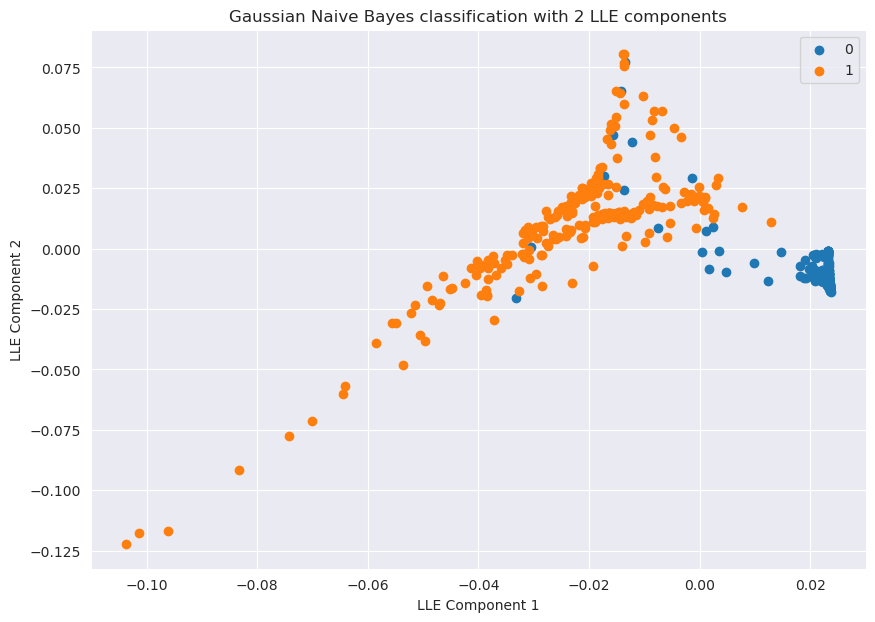

In [42]:
plt.figure(figsize=(10, 7))
for i, label in enumerate(np.unique(yval)):
    plt.scatter(Xval_lle[yval == label, 0], Xval_lle[yval == label, 1], label=label)


plt.legend()

plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.title('Gaussian Naive Bayes classification with 2 LLE components')
plt.show()

- Visualisation of the two LLE components shows clear clusters of classes, indicating good separability and low intra-class variability. Such well-defined clusters imply that after dimensionality reduction using LLE, the classes remained well distinguishable, making the task easier for a Gaussian naive Bayesian classifier. This indicates that the data quality after LLE transformation is high enough for this classification task, and the model was able to effectively learn and distinguish patterns for each class.

## LDA

In [33]:
accuracy_scores = train_and_validate_LDA(Xtrain, ytrain, Xval, yval, 'lle', solvers)

In [34]:
best_key = max(accuracy_scores, key=accuracy_scores.get)
best_n_components, best_solver = best_key
best_accuracy = accuracy_scores[best_key]

print(f'Best number of LLE components: {best_n_components}')
print(f'Best solver: {best_solver}')
print(f'Best accuracy: {best_accuracy:.4f}')

Best number of LLE components: 763
Best solver: svd
Best accuracy: 0.9812


In [35]:
# try normalisation
accuracy_scores = train_and_validate_LDA(Xtrain_scaled, ytrain, Xval_scaled, yval, 'lle', solvers)

In [36]:
best_key = max(accuracy_scores, key=accuracy_scores.get)
best_n_components, best_solver = best_key
best_accuracy = accuracy_scores[best_key]

print(f'Best number of LLE components: {best_n_components}')
print(f'Best solver: {best_solver}')
print(f'Best accuracy: {best_accuracy:.4f}')

Best number of LLE components: 760
Best solver: svd
Best accuracy: 0.9812


- Normalisation again had no effect, but the use of LLE was able to significantly improve the result, it was even better than SVM. But here, however, the best result was achieved with a large number of components, the dimensionality was almost not reduced.

# Final model and results

In [44]:
results = {
    'Classifier': ['SVC', 'Gaussian Bayes', 'Categorical Bayes', 'Multinomial Bayes', 'Bernoulli Bayes', 'LDA'],
    'Original': [float('nan'), 0.9292, 0.9021, 0.9458, 0.9542, 0.9313],
    'MinMax': [0.9854, float('nan'), float('nan'), float('nan'), float('nan'), float('nan')],
    'PCA': [float('nan'), 0.9521, float('nan'), float('nan'), float('nan'), 0.9792],
    'PCA MinMax': [0.9833, 0.9521, float('nan'), float('nan'), float('nan'), 0.9792],
    'LLE': [float('nan'), 0.9708, float('nan'), float('nan'), float('nan'), 0.9812],
    'LLE MinMAx': [0.9771, 0.9708, float('nan'), float('nan'), float('nan'),  0.9812],
}

df = pd.DataFrame(results)
df = df.fillna('NaN')

print(df.to_string(index=False))

       Classifier Original  MinMax     PCA PCA MinMax     LLE LLE MinMAx
              SVC      NaN  0.9854     NaN     0.9833     NaN     0.9771
   Gaussian Bayes   0.9292     NaN  0.9521     0.9521  0.9708     0.9708
Categorical Bayes   0.9021     NaN     NaN        NaN     NaN        NaN
Multinomial Bayes   0.9458     NaN     NaN        NaN     NaN        NaN
  Bernoulli Bayes   0.9542     NaN     NaN        NaN     NaN        NaN
              LDA   0.9313     NaN  0.9792     0.9792  0.9812     0.9812


- It turns out that the best model based on the results on the validation dataset is the SVM without applying reduction

In [116]:
# test the final model
best_model = best_svm
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, best_model.predict(Xtest_scaled))))  # model was trained on the scaled data

accuracy score (test): 0.983333


- We can say that the accuracy when working with new data that were not used during training and selection of parameters and model will be 98.3%

In [118]:
Xdata_scaled = scaler.transform(Xdata)

In [119]:
# train best model on all data
best_model.fit(Xdata_scaled, ydata)

SVC(C=10, gamma=0.01)

In [120]:
to_eval = pd.read_csv('evaluate.csv')

In [121]:
Xeval = to_eval.drop(columns=['ID'], errors='ignore')

In [123]:
# Min-max scaler fit on training data
Xeval_scaled = scaler.fit_transform(Xeval)
# Get predictions from the model
predictions = best_model.predict(Xeval_scaled)

In [124]:
# DataFrame for the results
results = pd.DataFrame({
    'ID': to_eval['ID'],
    'label': predictions
})

In [125]:
# Saving results
results.to_csv('results.csv', index=False)

# Bonus

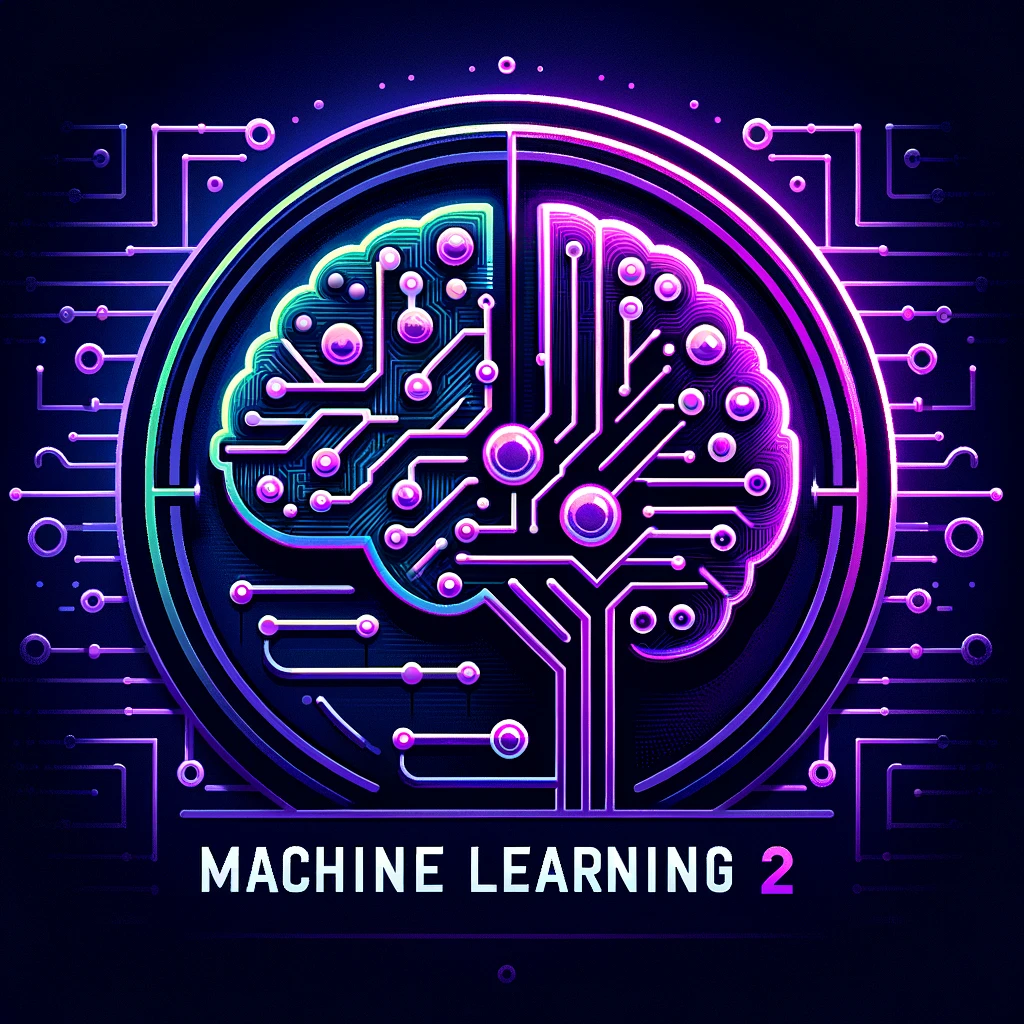

In [118]:
from PIL import Image
import io
from IPython.display import display
# I asked DALL E to create a logo for the Machine learning 2 subject
image_path = 'bonus.webp' # generated by Chat GPT - DALL E

with open(image_path, 'rb') as f:
    image = Image.open(io.BytesIO(f.read()))
    display(image)

Děkuji za úkol!